<a href="https://colab.research.google.com/github/tomstaite/Development-of-a-Convolutional-Neural-Network-for-the-detection-of-Railway-Track-Maintenance/blob/master/KERAS_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks Experimentation

## Mount Google Drive (for access to images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Import Useful Libraries

In [ ]:
# import statemnts
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix




## Set Learning Hyper-Parameters

In [ ]:
batch_size = 20
num_epoch = 30
n_classes = 5
dropout = 0.75

## Import Dataset From Google Drive (Either Affine, Elastic, or Mixed)

In [ ]:
data = []
labels = []

for i in range(1,6):
  for j in range(1,2001):
    img  = np.array(cv2.imread('/content/drive/My Drive/Thomas Staite - Convolutional Neural Network/NEW DATASETS/AffineAndElastic/Class '+str(i)+'/Class'+str(i)+'Image'+str(j)+'.png', 0))
    data.append(img.flatten())
    labels.append(i)
    if j % 100 == 0:
      print('class:', i, 'file step:', j)
      

      
    
data = np.array(data)
labels = np.array(labels)
print(data[0])
print(labels)

## Display a random selection of the dataset

In [ ]:

def display_images(batchSize, data, labels):
  idx = np.arange(0, len(data))
  # Shuffle the order of the data and select an amount to show
  np.random.shuffle(idx)
  idx = idx[: batchSize]
  data_shuffle = [data[i] for i in idx]
  labels_shuffle = [labels[i] for i in idx]
  x = data_shuffle
  y = labels_shuffle
  # Plot the images using MatPlotLib.pyPlot
  fig, axes = plt.subplots(3, 3)
  fig.set_size_inches(22.5, 15.5)
  fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
  for i, ax in enumerate(axes.flat):
    ax.imshow(x[i].reshape(256,134), cmap='gray')
    ax.set_xlabel(int(y[i]))
    ax.set_xticks([])
    ax.set_yticks([])
  plt.show()

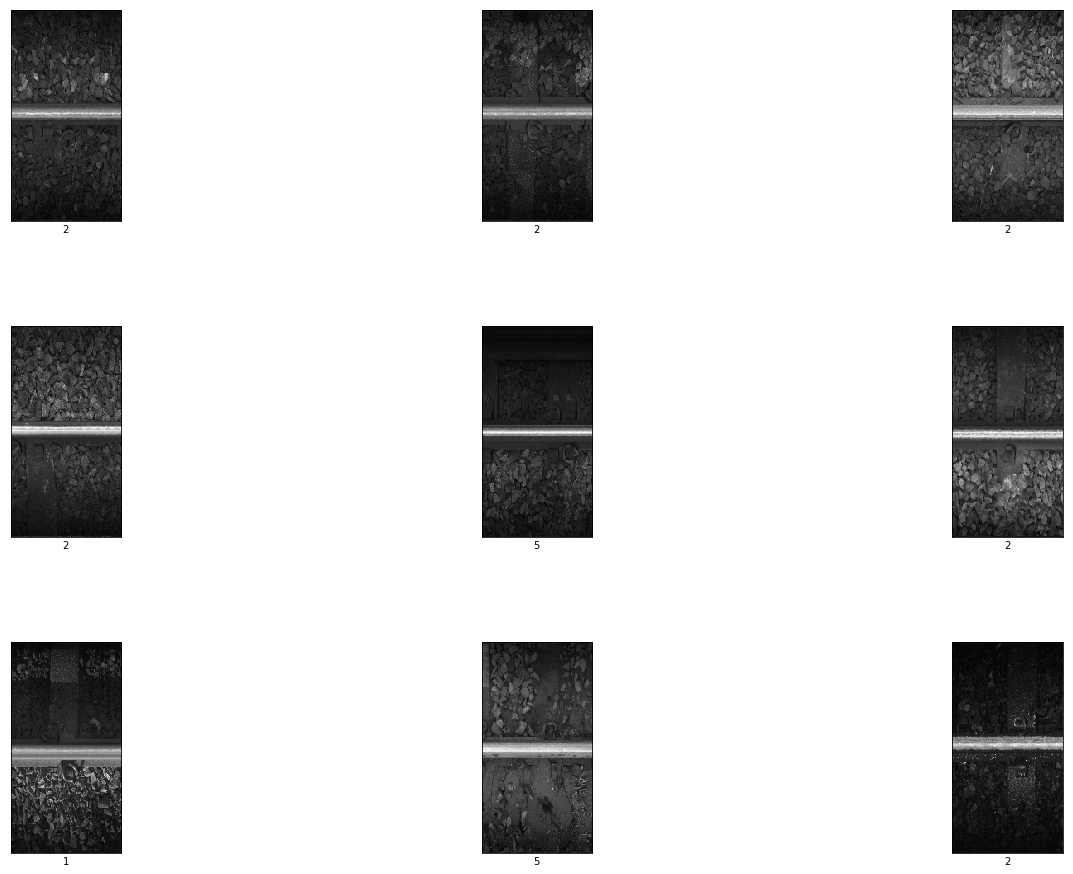

In [ ]:
display_images(9, data, labels)

## Function to split the dataset into training and testing

In [ ]:
def splitData(Xvals, Yvals):

  idx = np.arange(0, len(Xvals))
  # Shuffle the order of the data to preperare it for splitting
  np.random.shuffle(idx)
  Xvals = [Xvals[i] for i in idx]
  Yvals = [Yvals[i] for i in idx]
  
  Xvals = np.array(Xvals)
  Yvals = np.array(Yvals)
  # Split the data into 90% training and 10% testing
  X_train, X_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=0.1, random_state=50)
  
  print('--- Training Data ---')
  print('No. instances X_train:', X_train.shape)
  print('No. instances y_train:', y_train.shape)
  print('')
  print('--- Testing Data ---')
  print('No. instances X_test:', X_test.shape)
  print('No. instances y_test:', y_test.shape)
  
  y_train = y_train -1
  y_test = y_test -1
  print(y_train)
  
  return(X_train, X_test, y_train, y_test)

In [ ]:

# Call function to split the data
X_train, X_test, y_train, y_test = splitData(data, labels)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

--- Training Data ---
No. instances X_train: (9000, 34304)
No. instances y_train: (9000,)

--- Testing Data ---
No. instances X_test: (1000, 34304)
No. instances y_test: (1000,)
[1 3 1 ... 0 0 1]


## Reshape the data into the format accepted by CNN

In [ ]:
img_rows = 134
img_cols = 256



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalization will help to remove distortions caused by lights and shadows in an image.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)

X_train shape: (9000, 134, 256, 1)


# CNN Architecture 1 - Small

In [ ]:
model = Sequential()

#--- Conv Layer 1 with ReLU activation ---
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
#--- MaxPool Layer 1 for dimension reduction and feature selection ---
model.add(MaxPooling2D(pool_size=(3, 3)))
#--- Conv Layer 2 with ReLU activation ---
model.add(Conv2D(10, (5, 5), activation='relu'))
#--- MaxPool Layer 2 for dimension reduction and feature selection ---
model.add(MaxPooling2D(pool_size=(3, 3)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten reshape and prepare data for FC layers
model.add(Flatten())
#--- Fully Connected Layer 1 with ReLU activation ---
model.add(Dense(40, activation='relu'))
#one more dropout for convergence' sake 
model.add(Dropout(0.5))
#--- Fully Connected Output Layer with softmax to squash the matrix into output probabilities
model.add(Dense(n_classes, activation='softmax'))

## Model Summary

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 130, 252, 6)       156       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 84, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 80, 10)        1510      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 26, 10)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 40)                135240    
__________

# CNN Architecture 2 - Medium

In [ ]:
model = Sequential()

#--- Conv Layer 1 with ReLU activation ---
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
#--- MaxPool Layer 1 for dimension reduction and feature selection ---
model.add(MaxPooling2D(pool_size=(2, 2)))
#--- Conv Layer 2 with ReLU activation ---
model.add(Conv2D(20, (5, 5), activation='relu'))
#--- MaxPool Layer 2 for dimension reduction and feature selection ---
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten reshape and prepare data for FC layers
model.add(Flatten())
#--- Fully Connected Layer 1 with ReLU activation ---
model.add(Dense(40, activation='relu'))
#--- Fully Connected Layer 2 with ReLU activation ---
model.add(Dense(20, activation='relu'))
#one more dropout for convergence' sake 
model.add(Dropout(0.5))
#--- Fully Connected Output Layer with softmax to squash the matrix into output probabilities
model.add(Dense(n_classes, activation='softmax'))

## Model Summary

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 130, 252, 10)      260       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 65, 126, 10)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 122, 20)       5020      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 61, 20)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 61, 20)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36600)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 40)                1464040   
__________

# CNN Architecture 3 - Large

In [ ]:
model = Sequential()

#--- Conv Layer 1 with ReLU activation ---
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#--- MaxPool Layer 1 for dimension reduction and feature selection ---
model.add(MaxPooling2D(pool_size=(2, 2)))
#--- Conv Layer 2 with ReLU activation ---
model.add(Conv2D(64, (3, 3), activation='relu'))
#--- MaxPool Layer 2 for dimension reduction and feature selection ---
model.add(MaxPooling2D(pool_size=(3, 3)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten reshape and prepare data for FC layers
model.add(Flatten())
#--- Fully Connected Layer 1 with ReLU activation ---
model.add(Dense(70, activation='relu'))
#--- Fully Connected Layer 2 with ReLU activation ---
model.add(Dense(40, activation='relu'))
#--- Fully Connected Layer 3 with ReLU activation ---
model.add(Dense(15, activation='relu'))
#one more dropout for convergence' sake 
model.add(Dropout(0.5))
#--- Fully Connected Output Layer with softmax to squash the matrix into output probabilities
model.add(Dense(n_classes, activation='softmax'))

## Model Summary

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 132, 254, 32)      320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 66, 127, 32)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 125, 64)       18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 21, 41, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 21, 41, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 55104)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 70)                3857350   
__________

## Compile Model, define loss function, optimizer, and performance metrics

In [ ]:
#Adaptive learning rate (adaDelta) is a form of gradient descent
#categorical since we have multiple classes (5) 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Implement Early Stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Implement Model Checkpoint to find the epoch that provided best model
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

## Train the model on the dataset

In [ ]:
#model training
model_log = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_split=0.1, callbacks=[es, mc])

Train on 8100 samples, validate on 900 samples
Epoch 1/30
8100/8100 [==============================] - 20s 2ms/step - loss: 1.5970 - acc: 0.2383 - val_loss: 1.5023 - val_acc: 0.3567

Epoch 00001: val_acc improved from -inf to 0.35667, saving model to best_model.h5
Epoch 2/30
8100/8100 [==============================] - 19s 2ms/step - loss: 1.4328 - acc: 0.3354 - val_loss: 1.2096 - val_acc: 0.4511

Epoch 00002: val_acc improved from 0.35667 to 0.45111, saving model to best_model.h5
Epoch 3/30
8100/8100 [==============================] - 19s 2ms/step - loss: 1.1344 - acc: 0.4605 - val_loss: 0.8793 - val_acc: 0.5500

Epoch 00003: val_acc improved from 0.45111 to 0.55000, saving model to best_model.h5
Epoch 4/30
8100/8100 [==============================] - 19s 2ms/step - loss: 0.9521 - acc: 0.5136 - val_loss: 0.8911 - val_acc: 0.5467

Epoch 00004: val_acc did not improve from 0.55000
Epoch 5/30
8100/8100 [==============================] - 19s 2ms/step - loss: 0.8694 - acc: 0.5444 - val_los

## Print final test loss and test accuracy

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.7500581729412079
Test accuracy: 0.845


## Plot model accuracy and model loss graphs

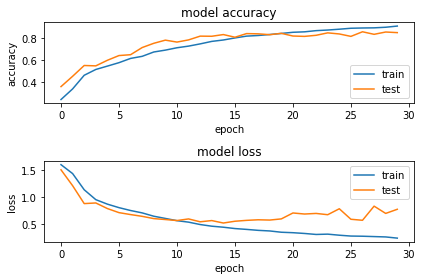

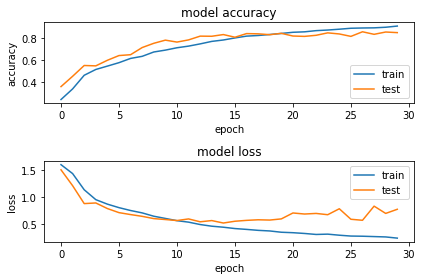

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

## Plot Confusion Matrix Heatmap

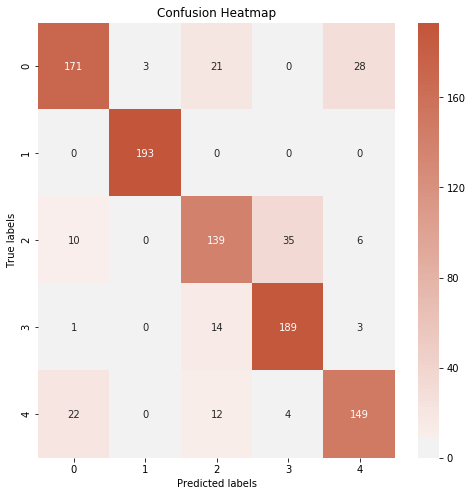

In [ ]:
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

fig, ax = plt.subplots( figsize=(8,8))
#ax= plt.subplot()
sns.heatmap(matrix, annot=True, center=True,cmap=sns.diverging_palette(220,20,as_cmap=True), fmt='d', ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Heatmap'); 




## Save the Model

In [ ]:
model.save('final_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model